In [3]:
import os
import glob
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

import fnmatch
import collections
import keras
import librosa
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import models, layers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot, cm
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
os.chdir ("/home/silvia/Escritorio/tfm/Server_auth/behavior/1")
extension = 'csv'
files=[i for i in glob.glob('*.{}'.format(extension))]
print(files)
user = pd.concat([pd.read_csv(f) for f in files])
user=user.sample(frac=1).reset_index(drop=True)
user=user.assign(user=1)
user.to_csv("../user.csv", index=False, encoding='utf-8-sig')


['1.csv', '3.csv', '4.csv', '2.csv', '7.csv', '6.csv', '0.csv', '5.csv']


In [4]:
user

,time_secs,scrolling,mouse_clicks,e_legend_clicks,e_map_clicks,map_clicks,general_clicks,close_top_clicks,close_bottom_clicks,go_clicks,map_zoom,mouse_mov,key_presses,priority,order,user
0,45,1.177778,0.244444,0.000000,0.454545,0.090909,0.0,0,0.454545,0.000000,0.000000,26.800000,0,1,0,1
1,20,0.000000,0.300000,0.000000,0.333333,0.333333,0.0,0,0.333333,0.000000,1.400000,39.950000,0,1,0,1
2,45,0.000000,0.288889,0.000000,0.384615,0.230769,0.0,0,0.384615,0.000000,0.622222,33.555556,0,1,0,1
3,35,0.000000,0.257143,0.000000,0.555556,0.000000,0.0,0,0.444444,0.000000,0.000000,27.742857,0,1,0,1
4,10,0.000000,0.200000,0.500000,0.000000,0.000000,0.0,0,0.000000,0.500000,0.000000,20.500000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,15,0.000000,0.333333,0.000000,0.400000,0.400000,0.0,0,0.200000,0.000000,1.866667,39.666667,0,1,0,1
71,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,22.000000,0,1,1,1
72,20,0.000000,0.250000,0.000000,0.400000,0.200000,0.0,0,0.200000,0.200000,2.250000,36.350000,0,1,1,1
73,20,0.000000,0.250000,0.400000,0.200000,0.000000,0.0,0,0.200000,0.200000,0.000000,28.100000,0,1,1,1


In [5]:
size= int(len(user.index)*0.8)
print(size)
user_train=user.iloc[:size, :]
user_test=user.iloc[size:, :]

60


In [6]:
os.chdir ("/home/silvia/Escritorio/tfm/Server_auth/behavior/0")
extension = 'csv'
files=[i for i in glob.glob('*.{}'.format(extension))]
print(files)
nouser = pd.concat([pd.read_csv(f) for f in files])
nouser=nouser.sample(frac=1).reset_index(drop=True)
nouser=nouser.assign(user=0)
nouser.to_csv("../nouser.csv", index=False, encoding='utf-8-sig')

['15.csv', '17.csv', '18.csv', '10.csv', '13.csv', '14.csv', '16.csv', '11.csv', '8.csv', '19.csv', '9.csv', '12.csv']


In [7]:
nouser

,time_secs,scrolling,mouse_clicks,e_legend_clicks,e_map_clicks,map_clicks,general_clicks,close_top_clicks,close_bottom_clicks,go_clicks,map_zoom,mouse_mov,key_presses,priority,order,user
0,80,0.000000,0.025000,0.500000,0.000000,0.000000,0,0.500000,0.000000,0.000000,0.000000,5.325000,0.000000,0,0,0
1,15,0.000000,0.200000,0.666667,0.000000,0.000000,0,0.000000,0.333333,0.000000,0.000000,10.733333,0.133333,0,0,0
2,24,2.750000,0.375000,0.000000,0.333333,0.333333,0,0.000000,0.000000,0.333333,0.000000,36.208333,0.000000,0,0,0
3,5,0.000000,0.200000,1.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,21.400000,0.000000,1,1,0
4,30,3.400000,0.400000,0.416667,0.000000,0.000000,0,0.583333,0.000000,0.000000,1.100000,26.366667,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,5,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0
95,10,0.000000,0.200000,0.000000,0.500000,0.000000,0,0.000000,0.000000,0.500000,0.000000,38.800000,0.000000,0,0,0
96,10,7.900000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0
97,10,0.000000,0.700000,0.000000,0.571429,0.000000,0,0.428571,0.000000,0.000000,0.000000,79.900000,0.000000,0,0,0


In [8]:
size= int(len(nouser.index)*0.8)

print(size)
nouser_train=nouser.iloc[:size, :]
nouser_test=nouser.iloc[size:, :]

79


In [9]:
frames=[nouser_train, user_train]
train=pd.concat(frames)
frames=[nouser_test, user_test]
test=pd.concat(frames)

In [10]:
testData=test.drop(columns='time_secs')
trainData=train.drop(columns='time_secs')


In [11]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]
print(set(y_train))

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)

{0, 1}
Y from training data: (97,)
Y from validation data: (42,)
Y from test data: (35,)


In [12]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

print(set(y_train))


X from training data (97, 14)
X from validation data (42, 14)
X from test data (35, 14)
{0, 1}


In [13]:
import os
import fnmatch
import collections
weight={}
path='audios/audios/56_speakers_audio_data'
weight.update({0: len(nouser.index), 1: len(user.index)})
max_value=sum(weight.values())
print("Sum of values: "+str(max_value))
weight = {key: value for key, value in sorted(weight.items())}
print(weight)
class_weight = {k: 1-(v/max_value) for k, v in weight.items()}
print(class_weight)

Sum of values: 174
{0: 99, 1: 75}
{0: 0.43103448275862066, 1: 0.5689655172413793}


In [14]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(150, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(y_train), activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=80, verbose=1)
print(X_train.shape)
#Train with early stopping to avoid overfitting
y_train=np.array(y_train, dtype=int)
y_val=np.array(y_val, dtype=int)
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=200,batch_size=30, callbacks=[es])
print(set(y_test))

(97, 14)
Epoch 1/200


2023-04-10 10:47:47.970750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-10 10:47:47.970962: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-10 10:47:47.970979: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (silvia-XPS-15-9500): /proc/driver/nvidia/version does not exist
2023-04-10 10:47:47.971748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 1s 50ms/step - loss: 4.7818 - accuracy: 0.0000e+00 - val_loss: 9.1027 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 4.5693 - accuracy: 0.0103 - val_loss: 7.2958 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 4.5078 - accuracy: 0.0000e+00 - val_loss: 6.0216 - val_accuracy: 0.1190
Epoch 4/200
4/4 [==============================] - 0s 7ms/step - loss: 4.4179 - accuracy: 0.0309 - val_loss: 5.1330 - val_accuracy: 0.4524
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 4.2944 - accuracy: 0.0722 - val_loss: 4.4147 - val_accuracy: 0.7381
Epoch 6/200
4/4 [==============================] - 0s 8ms/step - loss: 4.1052 - accuracy: 0.2062 - val_loss: 3.8972 - val_accuracy: 0.9048
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 4.0075 - accuracy: 0.2371 - val_loss: 3.7511 - val_accuracy: 0.9048
Epoch 8/200
4/4 [=====

4/4 [==============================] - 0s 8ms/step - loss: 0.3030 - accuracy: 0.8660 - val_loss: 25.5356 - val_accuracy: 0.9286
Epoch 60/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3086 - accuracy: 0.8454 - val_loss: 25.1873 - val_accuracy: 0.9286
Epoch 61/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3408 - accuracy: 0.8660 - val_loss: 25.1905 - val_accuracy: 0.9286
Epoch 62/200
4/4 [==============================] - 0s 8ms/step - loss: 0.4027 - accuracy: 0.8247 - val_loss: 25.9376 - val_accuracy: 0.9286
Epoch 63/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2529 - accuracy: 0.8866 - val_loss: 26.9762 - val_accuracy: 0.9286
Epoch 64/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2223 - accuracy: 0.8969 - val_loss: 27.7096 - val_accuracy: 0.9286
Epoch 65/200
4/4 [==============================] - 0s 8ms/step - loss: 0.2634 - accuracy: 0.8866 - val_loss: 28.3647 - val_accuracy: 0.9048
Epoch 66/200
4/4 [========

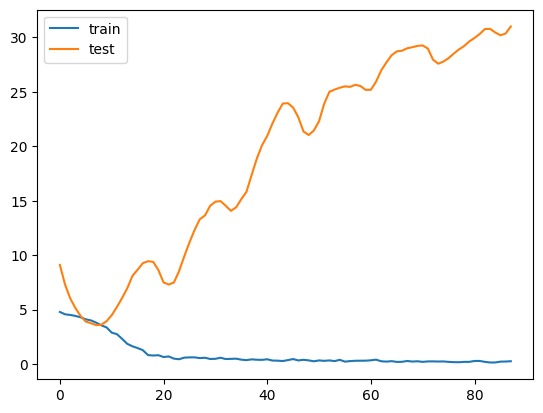

In [15]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
        
def printPrediction(X_data, y_data, printDigit, model):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        predict_x=model.predict(X_data[i:i+1])[0]
        predict_classes = np.argmax(predict_x)
        print(predict_classes)
        print(max(predict_x))
        prediction = predict_classes
    
        user = y_data[i]
        if printDigit == True:
           print("Number={0:d}, y={1:10d}- prediction={2:10d}- match={3}".format(i, user, prediction, user==prediction))
        else:
           print("y={0:10d}- prediction={1:10d}- match={2}".format(user, prediction, user==prediction))

In [17]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    #Confution Matrix and Classification Report
    #predict_y = model.predict_prob(X_data)
    predict_y=model.predict(X_data)
    Y_pred = np.argmax(predict_y, axis=1)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt[len(set(y_test_num))-1])
    key=0
    for val in conf_mt[len(set(y_test_num))-1]:
        if val!=0:
            print(key)
        key=key+1
    conf_mt=conf_mt / conf_mt.astype(np.float).sum(axis=1)
    #print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    print(classification_report(y_test_num, Y_pred))


In [18]:
print('\n# TEST DATA #\n')
y_test=np.array(y_test, dtype=int)
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
# Prediction
printPrediction(X_test, y_test, False, model)


# TEST DATA #

2/2 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8571
accuracy: 85.71%

# Generate predictions
1/1 [==============================] - 0s 65ms/step
0
0.5263316
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 14ms/step
0
0.99962354
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
0
0.606774
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 16ms/step
0
0.60668415
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
0
0.53005433
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
0
0.99783593
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 16ms/step
0
0.9999546
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 14ms/step
0
0.9873066
y=     

In [19]:
score

[0.2867390811443329, 0.8571428656578064]

Classification Report for Test Data

(35,)
(35, 14)
2/2 [==============================] - 0s 1ms/step
[ 5 10]
0
1


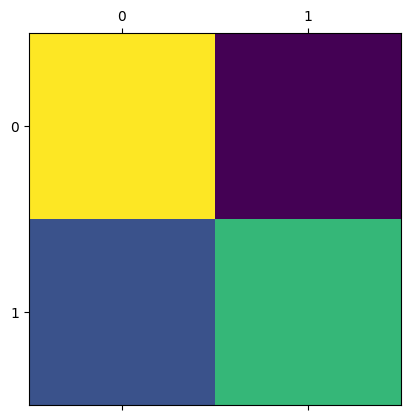


Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       1.00      0.67      0.80        15

    accuracy                           0.86        35
   macro avg       0.90      0.83      0.84        35
weighted avg       0.89      0.86      0.85        35



In [20]:
print("Classification Report for Test Data\n")
print(y_test.shape)
print(X_test.shape)
report(X_test, y_test)

In [19]:
import joblib
model.save('../behavior-recognition.h5')
joblib.dump(scaler, '../behavior_scaler.save') 

['../behavior_scaler.save']

### Testing

os.chdir ("/home/silvia/Escritorio/tfm/Server_auth/behavior/test")
extension = 'csv'
files=[i for i in glob.glob('*.{}'.format(extension))]
print(files)
test = pd.concat([pd.read_csv(f) for f in files])
test=test.sample(frac=1).reset_index(drop=True)
test=test.drop(columns='time_secs')

In [29]:
obj=[
    "time_secs,scrolling,mouse_clicks,e_legend_clicks,e_map_clicks,map_clicks,general_clicks,close_top_clicks,close_bottom_clicks,go_clicks,map_zoom,mouse_mov,key_presses,priority,order,user",
    [
        5,
        0,
        0.6,
        0,
        0.6666666666666666,
        0,
        0,
        0,
        0,
        0.3333333333333333,
        0,
        62,
        0,
        1,
        0,
        1
    ],
    [
        10,
        0,
        0.7,
        0,
        0.5714285714285714,
        0,
        0,
        0,
        0.2857142857142857,
        0.14285714285714285,
        0,
        66.7,
        0,
        1,
        0,
        1
    ],
    [
        15,
        0,
        0.6666666666666666,
        0,
        0.5,
        0,
        0,
        0,
        0.4,
        0.1,
        0,
        60.8,
        0,
        1,
        0,
        1
    ],
    [
        20,
        0,
        0.5,
        0,
        0.5,
        0,
        0,
        0,
        0.4,
        0.1,
        0,
        45.6,
        0,
        1,
        0,
        1
    ],
    [
        25,
        0,
        0.4,
        0,
        0.5,
        0,
        0,
        0,
        0.4,
        0.1,
        0,
        36.48,
        0,
        1,
        0,
        1
    ]
]

In [30]:
array=np.array(obj)
test=pd.DataFrame([x for i, x in enumerate(array) if i!=0], columns=array[0].split(','))
test=test.drop(columns='time_secs')

In [43]:
def predict():
    
    X_test = np.array(test.iloc[:, :-1], dtype = float)
    y_test = test.iloc[:, -1]
    
    X_test = scaler.transform( X_test )
    #y_test=np.array(y_test, dtype=int)
    
    score = new_model.evaluate(X_test, y_test)
    print(score)


In [44]:
print(score[1])

0.8571428656578064


In [45]:
new_model = keras.models.load_model('../behavior-recognition.h5')
scaler = joblib.load('../behavior_scaler.save') 


In [46]:
predict()

1/1 [==============================] - 0s 94ms/step - loss: 7.9177e-04 - accuracy: 1.0000
[0.0007917700568214059, 1.0]


In [26]:
print(score[1])

0.8571428656578064
